# Introduction:
In this Jupyter Notebook project, we will explore the essential techniques and methodologies of feature engineering to enhance the quality of our dataset for better predictive modeling. Feature engineering is a crucial step in the data preprocessing pipeline, aimed at selecting, transforming, and creating new features to improve model performance.

# Objective:
Our main goal is to optimize feature selection and transformation using various techniques such as variance threshold, Pearson's correlation, correlation between features, correlation with the target variable, and mutual information. We will demonstrate how each of these techniques can be applied to a dataset, highlighting their significance in improving model accuracy, reducing overfitting, and speeding up training.

# Project Structure:

* __Data Preparation:__ We will start by creating and inspecting the dataset.

* __Variance Threshold:__ This section will focus on identifying and removing low-variance features that do not contribute significantly to the model's performance. We will use the VarianceThreshold class from scikit-learn to perform this operation.

* __Pearson's Correlation:__ We will analyze the correlation between numerical features in the dataset using Pearson's correlation coefficient. Features that exhibit high correlations will be evaluated, and we will decide whether to keep, transform, or remove them to avoid multicollinearity.

* __Correlation with Target Variable:__ It's important to understand how each feature is correlated with the target variable. We will explore how strongly each feature influences the target and consider feature selection based on these insights.

* __Correlation Between Features:__ Multicollinearity can negatively impact model performance. In this section, we will delve into the correlation between features to identify and mitigate multicollinearity.

* __Mutual Information:__ We will compute mutual information scores for feature selection. This metric captures the dependency between features and the target, even for nonlinear relationships.

# Key Takeaways:
At the end of this project, you will have a deep understanding of the importance of feature engineering and a set of practical techniques to apply in your own data analysis and model building projects. By selecting and engineering features strategically, you can build more accurate and robust machine learning models.

Let's get started with the feature engineering journey!

In [ ]:
import pandas as pd

df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})

df.head()

In [2]:
# 10 x 6 features matrix
X = df.drop(columns=['exam_score'])
X.head(10)

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm,grade_level
0,bachelors,1,4,10,155,8
1,bachelors,2,3,10,151,8
2,bachelors,3,4,8,160,8
3,masters,3,3,8,160,8
4,masters,3,2,6,156,8
5,masters,4,3,6,150,8
6,masters,3,2,8,164,8
7,phd,4,2,8,151,8
8,phd,5,1,10,158,8
9,phd,5,1,10,152,8


In [3]:
# 5 x 1 target vector
y = df['exam_score']
y.head()

0    71
1    72
2    78
3    79
4    85
Name: exam_score, dtype: int64

# Variance threshold

* __Variance Threshold:__ This section will focus on identifying and removing low-variance features that do not contribute significantly to the model's performance. We will use the VarianceThreshold class from scikit-learn to perform this operation.

Variance measures how much a feature's values deviate from its mean. If a feature has very low variance, it means the values are almost constant, which may not provide any useful information for prediction. By setting a threshold and removing features with variance below that threshold, we can simplify the dataset and potentially improve model performance.

We are dropping __edu_goal__ feature as because is categorical

In [4]:
X_num = X.drop(columns=['edu_goal'])
X_num.head()

,hours_study,hours_TV,hours_sleep,height_cm,grade_level
0,1,4,10,155,8
1,2,3,10,151,8
2,3,4,8,160,8
3,3,3,8,160,8
4,3,2,6,156,8


In [5]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # 0 is default

print(selector.fit_transform(X_num))

[[  1   4  10 155]
 [  2   3  10 151]
 [  3   4   8 160]
 [  3   3   8 160]
 [  3   2   6 156]
 [  4   3   6 150]
 [  3   2   8 164]
 [  4   2   8 151]
 [  5   1  10 158]
 [  5   1  10 152]]


Grade_level was removed because there is no variation in its values — all students are 8th graders. 

VarianceThreshold offers a method called .get_support() that can return the indices of the selected features, which we can use to manually subset our numeric features DataFrame:

In [7]:
# Specify `indices=True` to get indices of selected features
print(selector.get_support(indices=True))

[0 1 2 3]


In [8]:
# Use indices to get the corresponding column names of selected features
num_cols = list(X_num.columns[selector.get_support(indices=True)])

print(num_cols)

['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']


In [9]:
# Subset `X_num` to retain only selected features
X_num = X_num[num_cols]
X_num.head()

,hours_study,hours_TV,hours_sleep,height_cm
0,1,4,10,155
1,2,3,10,151
2,3,4,8,160
3,3,3,8,160
4,3,2,6,156


In [10]:
X = X[['edu_goal'] + num_cols]
X.head()

,edu_goal,hours_study,hours_TV,hours_sleep,height_cm
0,bachelors,1,4,10,155
1,bachelors,2,3,10,151
2,bachelors,3,4,8,160
3,masters,3,3,8,160
4,masters,3,2,6,156


# Pearson’s correlation

Pearson's correlation is used to assess the linear relationship between pairs of numerical features. It helps identify highly correlated features, which can lead to multicollinearity issues in regression models.

The correlation coefficient, which ranges from -1 to 1, quantifies how two features change together. A high positive correlation (close to 1) means that as one feature increases, the other tends to increase as well. A high negative correlation (close to -1) means the opposite. Identifying and handling highly correlated features is crucial to avoid redundancy in the dataset, improve model interpretability, and reduce overfitting.

### Correlation between features

This technique explores the correlation between pairs of features in the dataset. It aims to identify and mitigate multicollinearity, which occurs when features are highly correlated with each other.

Multicollinearity can be problematic in regression models, as it makes it challenging to isolate the individual effects of correlated features. Identifying and addressing these issues by either removing one of the correlated features or applying dimensionality reduction techniques can improve model stability and interpretability.

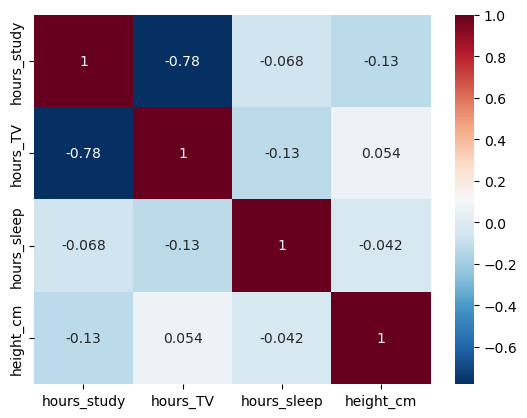

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method='pearson')  # 'pearson' is default

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [12]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

hours_TV hours_study -0.780763315142435


__hours_TV__ appears to be highly negatively correlated with hours_study — a student who watches a lot of TV tends to spend fewer hours studying, and vice versa. Because they provide redundant information, we can choose to remove one of those variables. To decide which one, we can look at their correlation with the target variable, then remove the one that is less associated with the target. 

### Correlation between feature and target

This technique focuses on understanding how each feature influences the target variable. It helps in feature selection by highlighting the features that have a strong impact on the prediction.

By calculating the correlation between each feature and the target variable, we can prioritize features that are highly correlated with the target. Features with strong correlations are often the most influential in making predictions. This method assists in selecting the most relevant features for modeling.

In [13]:
X_y = X_num.copy()
X_y['exam_score'] = y

In [14]:
X_y.head()

,hours_study,hours_TV,hours_sleep,height_cm,exam_score
0,1,4,10,155,71
1,2,3,10,151,72
2,3,4,8,160,78
3,3,3,8,160,79
4,3,2,6,156,85


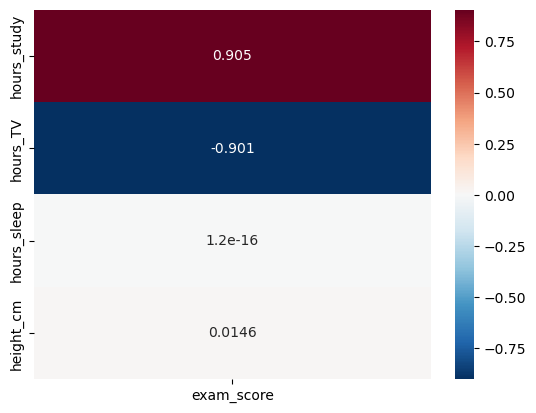

In [15]:
corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['exam_score']].drop(labels=['exam_score'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

hours_study has a stronger correlation with the target variable, therefore, I will remove hours_TV as the redundant feature:

In [16]:
X = X.drop(columns=['hours_TV'])
X.head()

,edu_goal,hours_study,hours_sleep,height_cm
0,bachelors,1,10,155
1,bachelors,2,10,151
2,bachelors,3,8,160
3,masters,3,8,160
4,masters,3,6,156


# Mutual information

Mutual information measures the dependency between features and the target variable, capturing both linear and non-linear relationships. It helps in feature selection by quantifying the predictive power of each feature.

Unlike correlation, mutual information is not limited to linear relationships. It considers any type of association between features and the target variable, making it useful for capturing complex patterns. Higher mutual information indicates that a feature provides more information about the target, making it a valuable candidate for inclusion in the model.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create copy of `X` for encoded version
X_enc = X.copy()
X_enc['edu_goal'] = le.fit_transform(X['edu_goal'])

In [20]:
X_enc.head()

,edu_goal,hours_study,hours_sleep,height_cm
0,0,1,10,155
1,0,2,10,151
2,0,3,8,160
3,1,3,8,160
4,1,3,6,156


Now, we can compute the mutual information between each feature and exam_score using mutual_info_regression(). This function is used because our target variable is continuous, but if we had a discrete target variable, we would use mutual_info_classif(). We specify the random_state in the function in order obtain reproducible results:

In [21]:
from sklearn.feature_selection import mutual_info_regression
print(mutual_info_regression(X_enc, y, random_state=68))

[0.50396825 0.40896825 0.06896825 0.        ]


In order to properly calculate the mutual information, we need to tell mutual_info_regression() which features are discrete by providing their index positions using the discrete_features parameter:

In [22]:
print(mutual_info_regression(X_enc, y, discrete_features=[0], random_state=68))

[0.75563492 0.38896825 0.18563492 0.        ]


Compared to earlier results, we notice higher mutual information between __"edu_goal"__ and the target variable when we correctly interpret __"edu_goal"__ as a discrete feature.

__"height_cm"__ and __"exam_score"__ show 0 mutual information, indicating independence, consistent with the near-zero Pearson's correlation coefficient.

Surprisingly, __"hours_sleep"__ and __"exam_score"__ exhibit positive mutual information, despite a 0 Pearson's correlation coefficient. This is because they have a nonlinear relationship, detected by mutual information but not Pearson's correlation.

To select top features with high mutual information with the target variable, we use __SelectKBest__ from scikit-learn, __specifying mutual_info_regression()__ as the scoring function and using __partial()__ to manage additional arguments. The __.fit_transform()__ method yields the chosen features as a numpy array.

In [23]:
from sklearn.feature_selection import SelectKBest
from functools import partial

score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)

# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=3)

print(selection.fit_transform(X_enc, y))

[[ 0  1 10]
 [ 0  2 10]
 [ 0  3  8]
 [ 1  3  8]
 [ 1  3  6]
 [ 1  4  6]
 [ 1  3  8]
 [ 2  4  8]
 [ 2  5 10]
 [ 2  5 10]]


As seen above, we selected the top 3 features based on mutual information, thus dropping height_cm. Like VarianceThreshold, SelectKBest also offers the .get_support() method that returns the indices of the selected features, so we could subset our original features DataFrame:

In [24]:
X = X[X.columns[selection.get_support(indices=True)]]
X.head()

,edu_goal,hours_study,hours_sleep
0,bachelors,1,10
1,bachelors,2,10
2,bachelors,3,8
3,masters,3,8
4,masters,3,6


# Conclusion

In our dataset, we began with 6 features to predict students' exam scores. Using filter methods, we streamlined this set: we removed "grade_level" due to zero variance, dropped "hours_TV" for being highly correlated with "hours_study," and filtered out "height_cm" based on mutual information, as it lacked predictive power. These filter methods, though simple, proved highly effective. 